<h1>Parical punto 2</h1>
Laura Sofía Ortiz Arcos, Santiago Romero Lozano



##2a Regresión polinomial y validación cruzada

Implementamos modelos de regresión grados (1,2,3,4)

[[-2.13979053]
 [ 2.44720121]
 [-2.47531695]
 [-0.49506981]
 [-1.76334267]
 [ 1.08597516]
 [-2.39292659]
 [-1.40980993]
 [-0.45666345]
 [ 2.05461486]
 [ 1.45180619]
 [ 1.94814015]]
[21.03982086 59.43614993 64.14865573  2.93098205 -0.34083606 -6.0439709
 45.85761295 -9.1155018   4.76457773 13.00965774 -6.20064498  8.66061131]


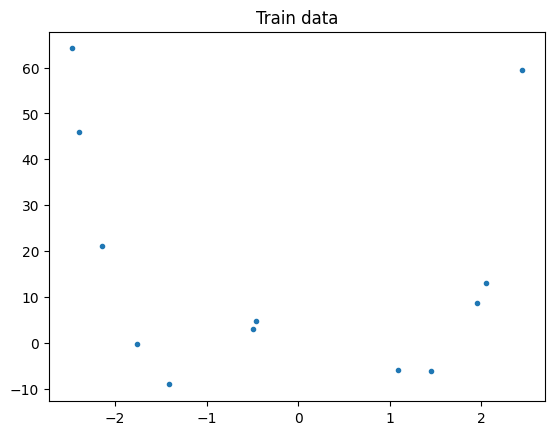

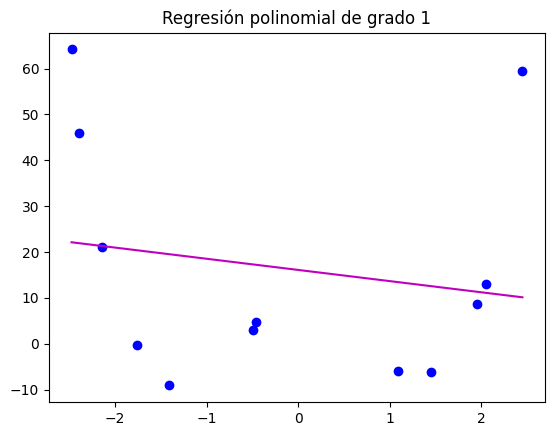

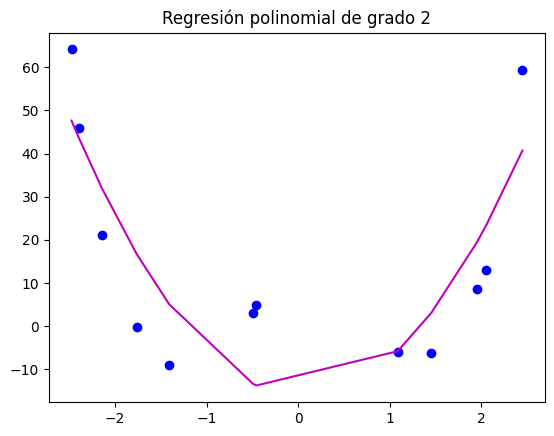

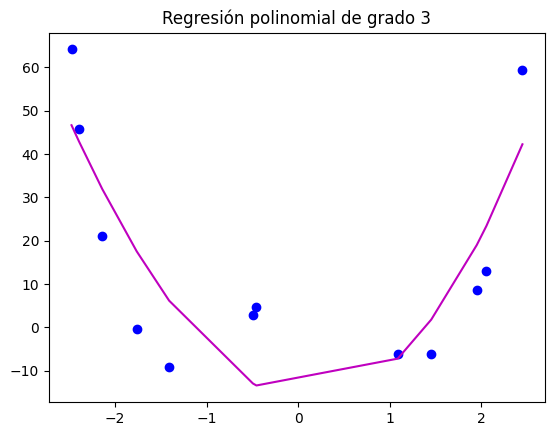

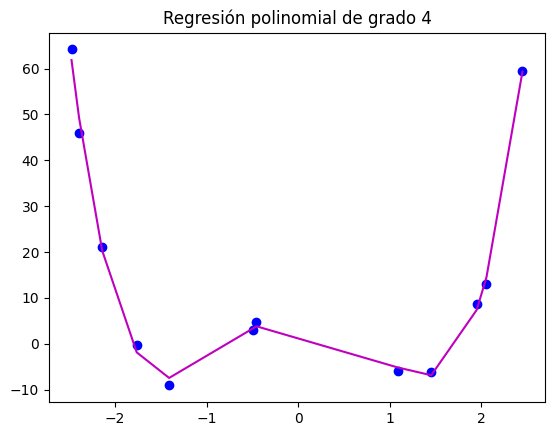

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import operator
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Asignamos la nube de puntos
Xtrain = np.load('part2xTrain.npy').reshape(-1,1)
Ytrain = np.load('part2yTrain.npy')
Xval = np.load('part2xVal.npy').reshape(-1,1)
Yval = np.load('part2yVal.npy')
print(Xtrain)
print(Ytrain)

#ploteamos para entender los puntos
plt.figure()
plt.plot(Xtrain,Ytrain,".")
plt.title('Train data')
plt.show()

print("\n")
degrees = [1,2,3,4]

#Implementamos diferentes modelos de regresión
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(Xtrain)

    model = LinearRegression()
    model.fit(X_poly, Ytrain)
    y_poly_pred = model.predict(X_poly)

    plt.scatter(Xtrain, Ytrain, color='blue')
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(Xtrain,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.title('Regresión polinomial de grado ' + str(degree))
    plt.show()
    print("\n")




Al ver las graficas se ve que el modelo que mejor explica los datos es el de grado 4, sin embargo vamos a hacer validación cruzada

Validación cruzada

In [ ]:
#hacemos cross validation para el modelo de 4 ya que es el que mejor nos explica los datos
scores = cross_val_score(model, Xtrain, Ytrain, cv=2)

print("Puntuaciones de validación cruzada:", scores)
print("Puntuación media de validación cruzada:", scores.mean())
print("\n")

kf = KFold(n_splits=2)
kf.get_n_splits(Xtrain)

#Usamos K-fold cross validation para los diferentes modelos
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(Xtrain)

    model = LinearRegression()
    model.fit(X_poly, Ytrain)
    y_poly_pred = model.predict(X_poly)

    scores = cross_val_score(model, X_poly, Ytrain, scoring='neg_mean_squared_error', cv=kf)
    print(f"Cross-validated scores for degree {degree}: {scores}")
    print("Average cross-validation score: {:.2f}".format(scores.mean()))





Puntuaciones de validación cruzada: [-0.24134964 -0.70520053]
Puntuación media de validación cruzada: -0.47327508589640543


Cross-validated scores for degree 1: [-995.99354921 -554.29520779]
Average cross-validation score: -775.14
Cross-validated scores for degree 2: [-380.41299512 -333.8301894 ]
Average cross-validation score: -357.12
Cross-validated scores for degree 3: [-526.65344938 -387.14220181]
Average cross-validation score: -456.90
Cross-validated scores for degree 4: [-12.69148213  -6.90939994]
Average cross-validation score: -9.80


Aqui podemos ver bajo el modelo usando solo dos folds que lo que mejor lo explica va a ser el de grado 4

Reportar metricas de MSE y MAE

For degree 1:
Mean Squared Error (MSE): 593.6720149609241
Mean Absolute Error (MAE): 19.542152172519216

For degree 2:
Mean Squared Error (MSE): 179.54508874058968
Mean Absolute Error (MAE): 12.078138073012084

For degree 3:
Mean Squared Error (MSE): 178.73252526263911
Mean Absolute Error (MAE): 12.139146300074634

For degree 4:
Mean Squared Error (MSE): 2.4109938501166748
Mean Absolute Error (MAE): 1.2955440422467035



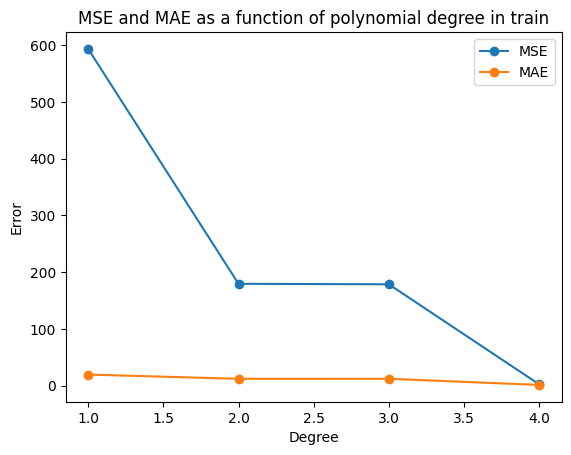

In [ ]:
mean_mse_scores = []
mean_mae_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(Xtrain)

    model = LinearRegression()
    model.fit(X_poly, Ytrain)
    y_poly_pred = model.predict(X_poly)

    mse = mean_squared_error(Ytrain, y_poly_pred)
    mae = mean_absolute_error(Ytrain, y_poly_pred)

    mean_mse_scores.append(mse)
    mean_mae_scores.append(mae)

    print(f"For degree {degree}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}\n")

plt.figure()
plt.plot(degrees, mean_mse_scores, 'o-', label='MSE')
plt.plot(degrees, mean_mae_scores, 'o-', label='MAE')
plt.title('MSE and MAE as a function of polynomial degree in train')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend()
plt.show()


##2b Mejora del modelo con Regularización

Experimentar con métodos de regularización Ridge o Lasso con los modelos polinomiales.

In [ ]:
from sklearn.linear_model import Ridge, Lasso


alphas = np.linspace(0,1,100)
poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(Xtrain)
X_test_poly = poly.fit_transform(Xval)

print(f"Degree {degree}:")

mse_lst_ridge = []
mse_lst_lasso = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_poly, Ytrain)
    y_ridge_pred = ridge_model.predict(X_poly)

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_poly, Ytrain)
    y_lasso_pred = lasso_model.predict(X_poly)


    ridge_mse = mean_squared_error(Ytrain, y_ridge_pred)
    mse_lst_ridge.append(mean_squared_error(Yval, ridge_model.predict(X_test_poly)))
    lasso_mse = mean_squared_error(Ytrain, y_lasso_pred)
    mse_lst_lasso.append(mean_squared_error(Yval, lasso_model.predict(X_test_poly)))
    print(f"For alpha {alpha}:")
    print(f"Ridge MSE: {ridge_mse}")
    print(f"Lasso MSE: {lasso_mse}\n")

min_lambda_ridge = min(mse_lst_ridge)
min_lambda_lasso = min(mse_lst_lasso)

Degree 4:
For alpha 0.0:
Ridge MSE: 2.410993850116673
Lasso MSE: 2.4109938501166757

For alpha 0.010101010101010102:
Ridge MSE: 2.411623712518717
Lasso MSE: 2.412055889593562

For alpha 0.020202020202020204:
Ridge MSE: 2.413496739275516
Lasso MSE: 2.4141908473976748

For alpha 0.030303030303030304:
Ridge MSE: 2.416588461779903
Lasso MSE: 2.4174001542569283

For alpha 0.04040404040404041:
Ridge MSE: 2.420874898627861
Lasso MSE: 2.4213958591544547

For alpha 0.05050505050505051:
Ridge MSE: 2.4263325447453807
Lasso MSE: 2.426393319398523

For alpha 0.06060606060606061:
Ridge MSE: 2.4329383607902746
Lasso MSE: 2.432392880950795

For alpha 0.07070707070707072:
Ridge MSE: 2.4406697628203164
Lasso MSE: 2.4393946657151733

For alpha 0.08080808080808081:
Ridge MSE: 2.449504612221068
Lasso MSE: 2.447398620681316

For alpha 0.09090909090909091:
Ridge MSE: 2.4594212058853038
Lasso MSE: 2.4564047265878672

For alpha 0.10101010101010102:
Ridge MSE: 2.4703982666374587
Lasso MSE: 2.466412993852265

Fo

<ipython-input-34-020802ed8b51>:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_poly, Ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.447e+01, tolerance: 7.355e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso MSE: 3.590864468039333

For alpha 0.494949494949495:
Ridge MSE: 3.5387678734628865
Lasso MSE: 3.6399909369670156

For alpha 0.5050505050505051:
Ridge MSE: 3.578642681512386
Lasso MSE: 3.6901196552388105

For alpha 0.5151515151515152:
Ridge MSE: 3.618980465107762
Lasso MSE: 3.7412507953364393

For alpha 0.5252525252525253:
Ridge MSE: 3.6597716221733605
Lasso MSE: 3.793384117369227

For alpha 0.5353535353535354:
Ridge MSE: 3.7010067238235806
Lasso MSE: 3.8465195114716155

For alpha 0.5454545454545455:
Ridge MSE: 3.742676510973499
Lasso MSE: 3.9006571399862935

For alpha 0.5555555555555556:
Ridge MSE: 3.7847718910244503
Lasso MSE: 3.9557970136641103

For alpha 0.5656565656565657:
Ridge MSE: 3.8272839346202034
Lasso MSE: 4.011939132505169

For alpha 0.5757575757575758:
Ridge MSE: 3.87020387247569
Lasso MSE: 4.069083496509502

For alpha 0.5858585858585859:
Ridge MSE: 3.9135230922732815
Lasso MSE: 4.127230105677016

For alpha 0.595959595959596:
Ridge MSE: 3.957233135627028
Lasso MSE: 4

2.472686404019764


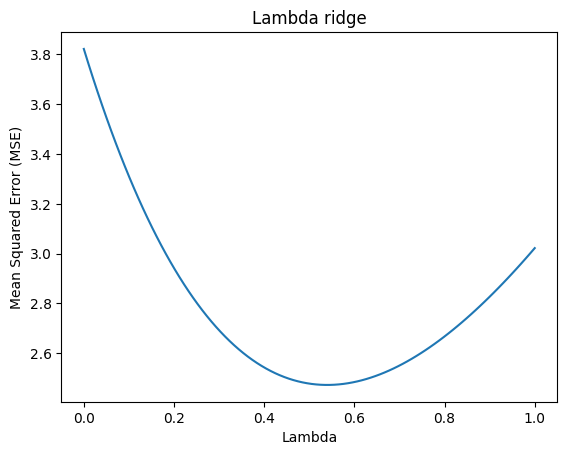

In [ ]:
plt.plot(alphas,mse_lst_ridge)
plt.xlabel("Lambda")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('Lambda ridge')
print(min_lambda_ridge)

2.2535261748798763


Text(0.5, 1.0, 'Lambda lasso')

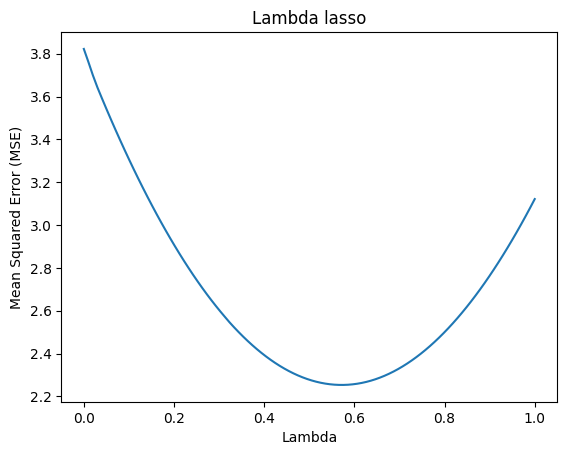

In [ ]:
print(min_lambda_lasso)
plt.plot(alphas,mse_lst_lasso)
plt.xlabel("Lambda")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('Lambda lasso')


Si corre la regresión lineal es la que minimiza el error, para encontrar el mejor alpha toca usar los datos de validación.

Luego con los datos de entrenamiento nuestro mejor alpha va a terminar siendo 0 sin embargo con los datos de validación vamos a encontrar un lambda diferente a 0 que nos muestra el mejor resultado del polinomio

Despues de hacer validación Ridge nos ayuda a explicar mejor que Lasso

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

# Definir los parámetros de regularización que quieres probar
alphas = [0.00001, 0.001, 0.01, 0.1, 1]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(Xval)

    print(f"Degree {degree}:")

    ridge_model = RidgeCV(alphas=alphas, cv=5)
    ridge_model.fit(X_poly, Yval)
    y_ridge_pred = ridge_model.predict(X_poly)

    lasso_model = LassoCV(alphas=alphas, cv=5)
    lasso_model.fit(X_poly, Yval)
    y_lasso_pred = lasso_model.predict(X_poly)

    ridge_mse = mean_squared_error(Yval, y_ridge_pred)
    lasso_mse = mean_squared_error(Yval, y_lasso_pred)

    print(f"Best alpha for Ridge: {ridge_model.alpha_}")
    print(f"Best alpha for Lasso: {lasso_model.alpha_}")
    print(f"Ridge MSE: {ridge_mse}")
    print(f"Lasso MSE: {lasso_mse}\n")


Degree 1:
Best alpha for Ridge: 1.0
Best alpha for Lasso: 1.0
Ridge MSE: 327.6555247868879
Lasso MSE: 327.97158535861513

Degree 2:
Best alpha for Ridge: 1.0
Best alpha for Lasso: 1.0
Ridge MSE: 94.65829956346491
Lasso MSE: 95.01431751907569

Degree 3:
Best alpha for Ridge: 1.0
Best alpha for Lasso: 1.0
Ridge MSE: 92.36455239981635
Lasso MSE: 93.06559377581846

Degree 4:
Best alpha for Ridge: 1e-05
Best alpha for Lasso: 1e-05
Ridge MSE: 0.8806246859174177
Lasso MSE: 0.8806246865945123

